### Лабораторная 9
### Ананьев Роман 

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

# Задание 1
<!-- Студентам было предложено написать тест по теме.
Разрешалось выполнить тест дважды (учитывался лучший результат,
варианты заданий менялись только в части числовых значений). В фай-
лах «Данные 9_1» приведены результаты и время выполнения теста
студентами первый и второй раз. Можно ли считать, что опыт выполне-
ния теста улучшил способности учащихся в решении задач? Если да, то
на каком уровне значимости?
Указание. Воспользуйтесь критерием знаков. Учтите, что данные
реальные и требуют предварительной обработки, поскольку некоторые
студенты не воспользовались возможностью вторично выполнить тест.
Результаты предварительно описать: найти выборочные характеристи-
ки, построить боксплоты. -->

In [2]:
sample = pd.read_excel("Data_9_1.xlsx", header=0)

# Различаем строки, где фамилия не различна с соседними фамилиями
rows_to_drop = []
for i in range(1, len(sample) - 1):  # Пропускаем первую и последнюю фамилию (нет двух соседей)
    prev_val = sample.at[i - 1, 'Фамилия']
    curr_val = sample.at[i, 'Фамилия']
    next_val = sample.at[i + 1, 'Фамилия']
    
    if curr_val != prev_val and curr_val != next_val:
        rows_to_drop.append(i)
# Удаляем ненужные строки
sample = sample.drop(rows_to_drop)
# Сброс индексов 
sample = sample.reset_index(drop=True)
sample = sample.drop(222) #Последняя фамилия не повторяется

print(sample)

      Фамилия         Имя Затраченное время Оценка/1,50
0     Акефьев       Игорь   51 мин. 54 сек.        1,00
1     Акефьев       Игорь   34 мин. 20 сек.        1,10
2    Алаличев      Никита              1 ч.        1,10
3    Алаличев      Никита   56 мин. 31 сек.        0,20
4     Алдкеев       Антон   55 мин. 30 сек.        0,80
..        ...         ...               ...         ...
217      Чэль        Лэлэ   54 мин. 39 сек.        1,00
218    Щекила  Александра   53 мин. 35 сек.        0,90
219    Щекила  Александра   18 мин. 45 сек.        1,40
220        Ял      Кирилл   58 мин. 30 сек.        1,10
221        Ял      Кирилл   58 мин. 48 сек.        0,90

[222 rows x 4 columns]


In [3]:
s_ = sample['Оценка/1,50']
n = len(s_) // 2
print(f"n = {n}")
first_mark = [float(s_[i].replace(',', '.')) for i in range(0, len(s_), 2)]  
second_mark = [float(s_[i].replace(',', '.')) for i in range(1, len(s_), 2)]

        
keep_indices = [i for i in range(len(first_mark)) 
               if first_mark[i] != second_mark[i]]

first_mark = [first_mark[i] for i in keep_indices]
second_mark = [second_mark[i] for i in keep_indices]


l = len(first_mark)
print(f"l = {l}")
# H0: проверим гипотезу о том, что различия в баллах выхваны случайными ошибками, т.е. p = 1/2 в распределении разности оценок
# H1: p < 1/2, т.е. результаты улучшились во второй раз по сравнению с первым
diff_list = [1 for x, y in zip(first_mark, second_mark) if x > y]
r = sum(diff_list)
print(f"r = {r}")

k1 = 2 * (l - r + 1)
print(f"k1 = {k1}")
k2 = 2 * r
print(f"k2 = {k2}")
F_value = (l - r) / (r + 1)
print(f"F_v = {F_value}")
p_value = 1 - sts.f.cdf(F_value, k1, k2)
print(f"p-value = {p_value:.3f}")
print(f"Диапазон α: α < {p_value:.3f}")

n = 111
l = 100
r = 43
k1 = 116
k2 = 86
F_v = 1.2954545454545454
p-value = 0.103
Диапазон α: α < 0.103


На данных уровнях значимости можно считать, что результаты улучшились во второй раз по сравнению с первым

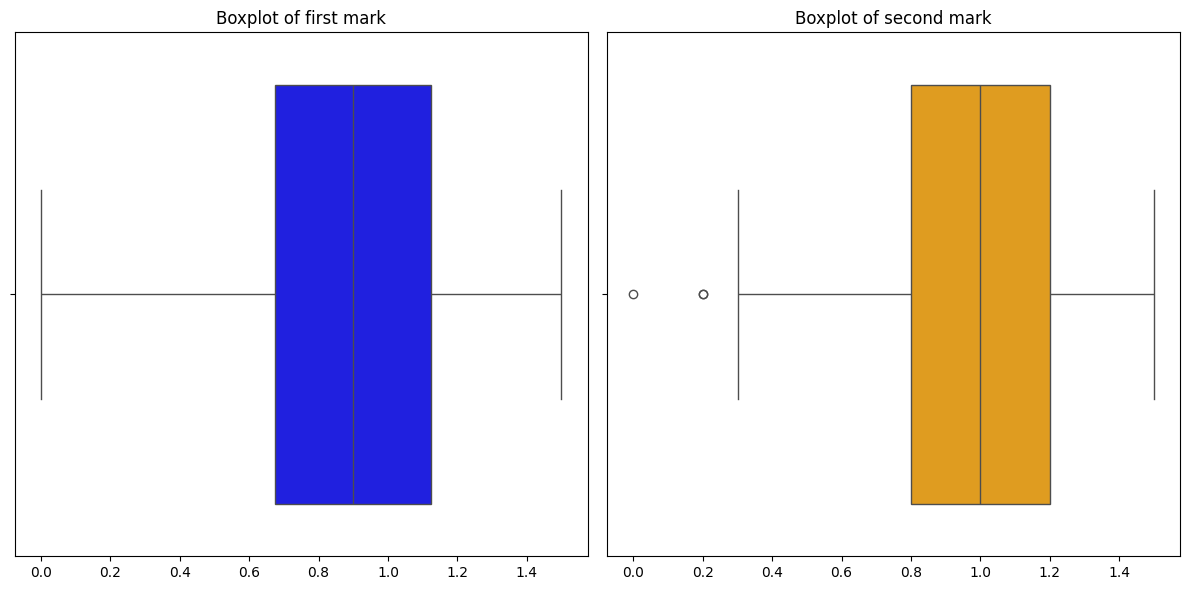

In [4]:
import seaborn as sns


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(first_mark,orient="h", color="blue")
plt.title('Boxplot of first mark')

plt.subplot(1, 2, 2)
sns.boxplot(second_mark,orient="h", color="orange")
plt.title('Boxplot of second mark')


plt.tight_layout()
plt.show()

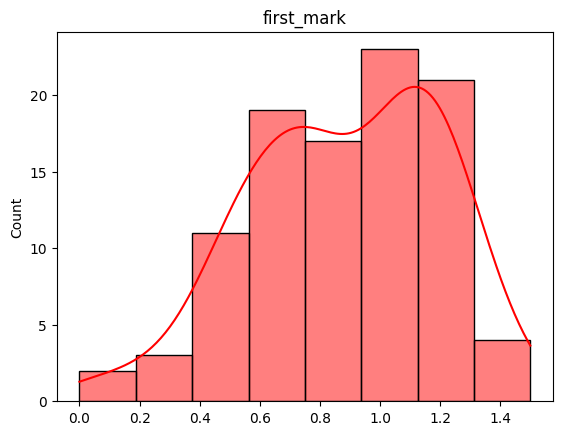

In [5]:
sns.histplot(first_mark, kde=True, color="red")
plt.title('first_mark')
plt.show()

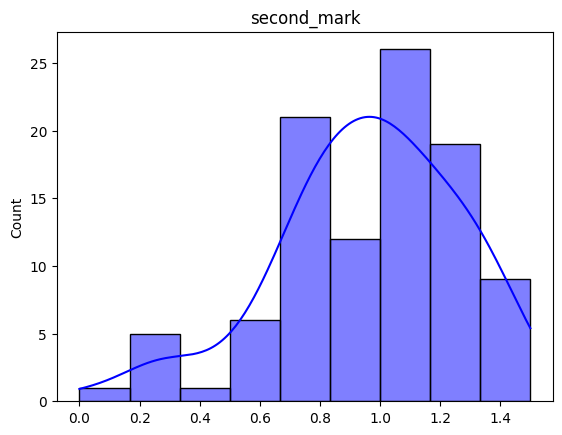

In [6]:
sns.histplot(second_mark, kde=True, color="blue")
plt.title('second_mark')
plt.show()

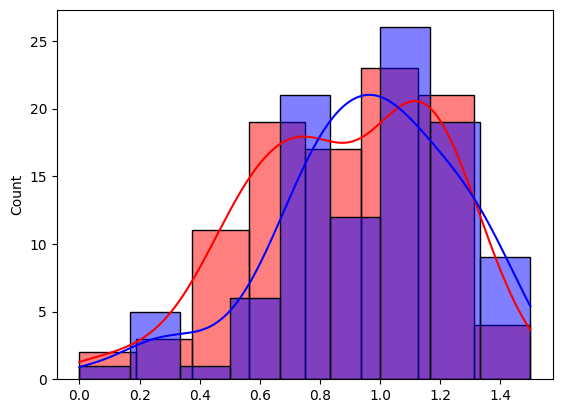

In [7]:
sns.histplot(first_mark, kde=True, color="red")
sns.histplot(second_mark, kde=True, color="blue")
plt.show()

In [8]:
def print_stats(data, name):
    print(f"\n--- Статистика для {name} ---")
    print(f"Среднее: {np.mean(data):.4f}")
    print(f"Медиана: {np.median(data):.4f}")
    print(f"Дисперсия: {np.var(data, ddof=1):.4f}")  
    print(f"Стандартное отклонение: {np.std(data, ddof=1):.4f}")
    print(f"Минимум: {np.min(data):.4f}")
    print(f"Максимум: {np.max(data):.4f}")

print_stats(first_mark, "first_mark")
print_stats(second_mark, "second_mark")


--- Статистика для first_mark ---
Среднее: 0.8840
Медиана: 0.9000
Дисперсия: 0.1018
Стандартное отклонение: 0.3190
Минимум: 0.0000
Максимум: 1.5000

--- Статистика для second_mark ---
Среднее: 0.9550
Медиана: 1.0000
Дисперсия: 0.0944
Стандартное отклонение: 0.3073
Минимум: 0.0000
Максимум: 1.5000


# Задание 2
<!-- Преподаватели Иванов и Петров, сидя за чашкой чая,
сетовали на то, что студенты год от года учатся все хуже и хуже… Но
так ли это? В файле «Данные 9_2» приведены данные успеваемости
студентов, изучавших дисциплину «Основы математического анализа»
в 2022 и 2023 году. Проанализируйте статистические данные по следу-
ющему плану:
1) Визуализируйте выборки (постройте гистограммы и бокспло-
ты), а также найдите выборочные числовые характеристики.
2) Проверьте гипотезу об однородности генеральных совокупно-
стей в части равенства характеристик положения, используя критерий
Уилкоксона – Манна – Уитни. -->

In [9]:
sample_1 = pd.read_excel("Data_9_2.xlsx", header=0)
res_22 = sample_1["OMA_22"].dropna()
res_23 = sample_1["OMA_23"].dropna()

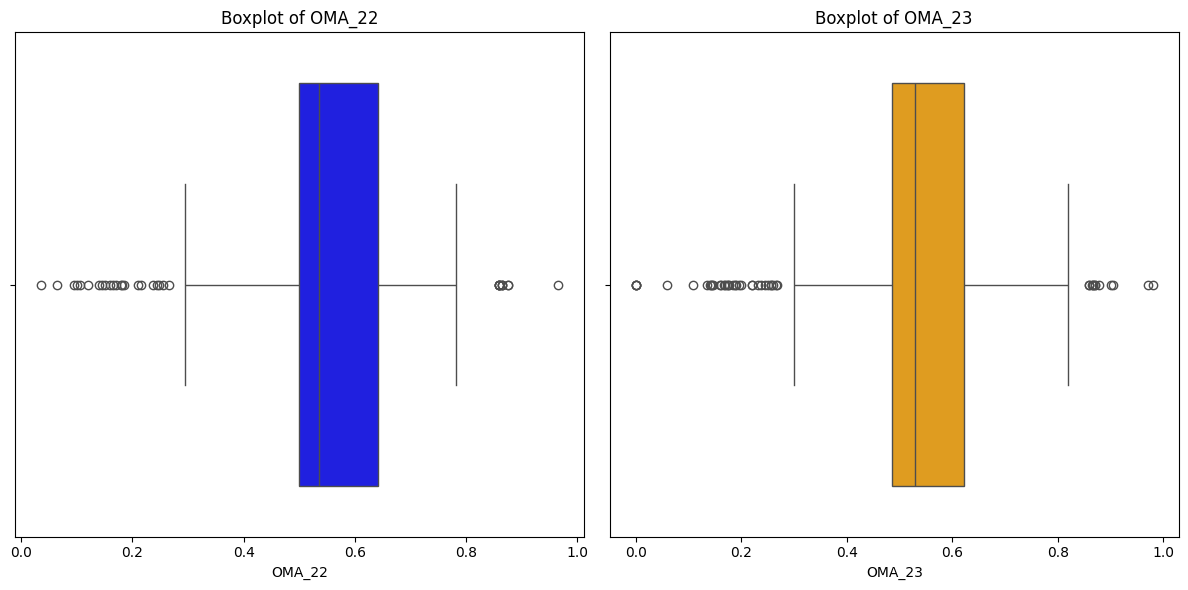

In [10]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(res_22,orient="h", color="blue")
plt.title('Boxplot of OMA_22')

plt.subplot(1, 2, 2)
sns.boxplot(res_23,orient="h", color="orange")
plt.title('Boxplot of OMA_23')


plt.tight_layout()
plt.show()

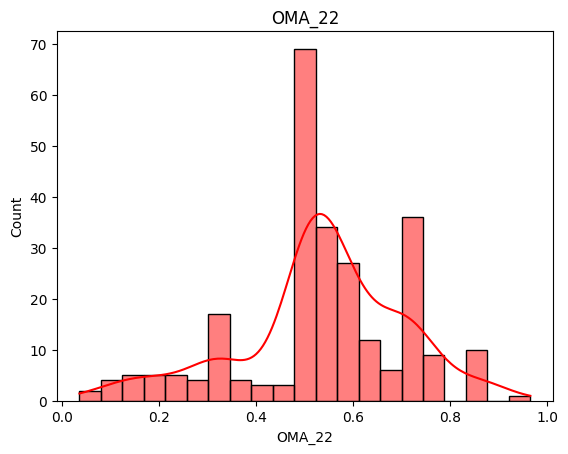

In [11]:
sns.histplot(res_22, kde=True, color="red")
plt.title('OMA_22')
plt.show()

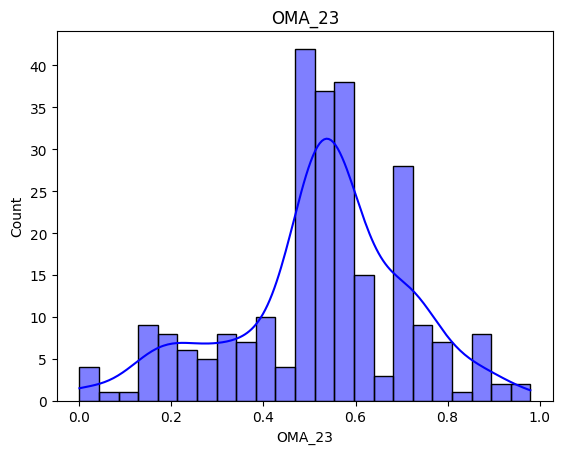

In [12]:
sns.histplot(res_23, kde=True, color="blue")
plt.title('OMA_23')
plt.show()

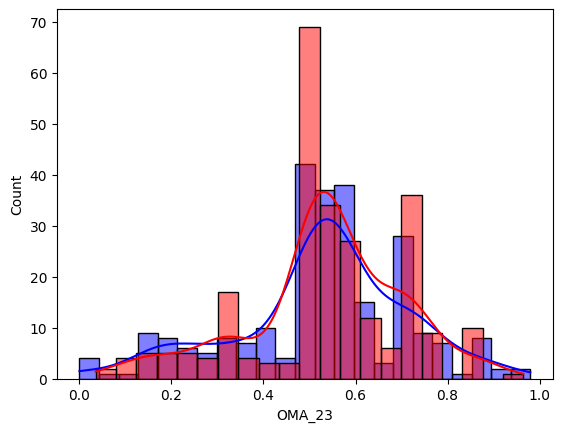

In [13]:
sns.histplot(res_23, kde=True, color="blue")
sns.histplot(res_22, kde=True, color="red")
plt.show()

In [14]:
print_stats(res_22, "res_22")
print_stats(res_23, "res_23")


--- Статистика для res_22 ---
Среднее: 0.5351
Медиана: 0.5350
Дисперсия: 0.0290
Стандартное отклонение: 0.1702
Минимум: 0.0350
Максимум: 0.9650

--- Статистика для res_23 ---
Среднее: 0.5241
Медиана: 0.5300
Дисперсия: 0.0357
Стандартное отклонение: 0.1890
Минимум: 0.0000
Максимум: 0.9800


#### 2.2

In [15]:
x = res_22.to_list()
y = res_23.to_list()
sts.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided') # двустороння альтернатива

MannwhitneyuResult(statistic=np.float64(33051.0), pvalue=np.float64(0.8056618308043272))

p-value = 0.806 (что гораздо больше стандартного уровня значимости α = 0.05). Это означает, что нет статистически значимых различий между данными об успеваемости в 23-м и 22-м году.